
# Data mining on churn dataset

## Introduction

In this project we will try to predict the result of a binary target for a score dataset after having applied data mining techniques in order to build a fitted and robust model.

1. After the preliminary importation and cleaning of the dataset, we will proceed by realizing some exploratory data analysis using descriptive statistics, which will allow us to reach some preliminary conclusions and already discard some features. In this phase we'll make use of python libraries to clean and visualize the data. 
2. Then after having decided the statistical models to use, we'll begin with to resolve the model selection problem, by training and assessing the different models in order to get the best bias-variance trade-off. This phase will be tackled with R, as it offers more control on model parameters.
3. Once chosen the model which best fits the data and generalizes to new data, we measure the performance of the model by using an evaluation metric to some test data. 
4. At the end we can finally predict the targets on the score dataset by appling the model we've chosen.

## Dataset description

The dataset we are using deals with customers data gathered by a telecommunication company. The informations are aggregated from different databases (billing, customer service, ...) and regard mainly the phone calls made by the customers and the plans they subscribed to.

The target is represented by the binary Churn variable, which indicates if the customer has changed carrier, while the predictors are listed as follows:
* State: categorical, for the 50 states and the District of Columbia
* Account length: integer-valued, how long account has been active
* Area code: categorical
* Phone number: essentially a surrogate for customer ID
* International Plan: dichotomous categorical, yes or no
* VoiceMail Plan: dichotomous categorical, yes or no
* Number of voice mail messages: integer-valued
* Total day minutes: continuous, minutes customer used service during the day
* Total day calls: integer-valued
* Total day charge: continuous, based on foregoing two variables
* Total evening minutes: continuous, minutes customer used service during the evening
* Total evening calls: integer-valued
* Total evening charge: continuous, based on foregoing two variables
* Total night minutes: continuous, minutes customer used service during the night
* Total night calls: integer-valued
* Total night charge: continuous, based on foregoing two variables
* Total international minutes: continuous, minutes customer used service to make international calls
* Total international calls: integer-valued
* Total international charge: continuous, perhaps based on foregoing two variables
* Number of calls to customer service: integer-valued

## Import, clean
As we've told, in this section we'll make use of python and its libraries to import, clean and visualize data, so we start by importing the required libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's import the training dataset using `pandas` library and take a look at it using the `head` and `info` methods:

In [2]:
df = pd.read_csv('datasets/churn_working.csv')

In [3]:
df.head()

State  Account.Length  Area.Code     Phone Int.l.Plan VMail.Plan  \
0    MI             147        415  382-4943         no         no   
1    TN               3        415  400-4713         no         no   
2    AK             132        415  345-9153         no        yes   
3    MS             120        415  421-3226         no         no   
4    WV              43        415  348-5767         no         no   

   VMail.Message  Day.Mins  Day.Calls  Day.Charge  Night.Calls  Intl.Mins  \
0              0     130.6         83       22.20           72       15.6   
1              0     185.0        120       31.45           89       14.1   
2             39     175.7         93       29.87          118        8.6   
3              0     131.7         99       22.39          116       10.7   
4              0     199.9        108       33.98          103       11.3   

   Intl.Calls  Intl.Charge  CustServ.Calls Churn  
0           3         4.21               3    no  
1           3         3.81               3    no  
2           3         2.32               2    no  
3           3         2.89               1    no  
4           7         3.05               1    no

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 16 columns):
State             2333 non-null object
Account.Length    2333 non-null int64
Area.Code         2333 non-null int64
Phone             2333 non-null object
Int.l.Plan        2333 non-null object
VMail.Plan        2333 non-null object
VMail.Message     2333 non-null int64
Day.Mins          2333 non-null float64
Day.Calls         2333 non-null int64
Day.Charge        2333 non-null float64
Night.Calls       2333 non-null int64
Intl.Mins         2333 non-null float64
Intl.Calls        2333 non-null int64
Intl.Charge       2333 non-null float64
CustServ.Calls    2333 non-null int64
Churn             2333 non-null object
dtypes: float64(4), int64(7), object(5)
memory usage: 291.7+ KB


As we can see, the dataset is quite small (2333 examples) and some features, whose values are just 'yes' and 'no' are expressed as strings instead of booleans. So, let's transform them from `object` to `bool` dtype:

In [5]:
df['Int.l.Plan'] = df['Int.l.Plan']=='yes'
df['VMail.Plan'] = df['VMail.Plan']=='yes'
df['Churn'] = df['Churn']=='yes'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 16 columns):
State             2333 non-null object
Account.Length    2333 non-null int64
Area.Code         2333 non-null int64
Phone             2333 non-null object
Int.l.Plan        2333 non-null bool
VMail.Plan        2333 non-null bool
VMail.Message     2333 non-null int64
Day.Mins          2333 non-null float64
Day.Calls         2333 non-null int64
Day.Charge        2333 non-null float64
Night.Calls       2333 non-null int64
Intl.Mins         2333 non-null float64
Intl.Calls        2333 non-null int64
Intl.Charge       2333 non-null float64
CustServ.Calls    2333 non-null int64
Churn             2333 non-null bool
dtypes: bool(3), float64(4), int64(7), object(2)
memory usage: 243.9+ KB


Now we can begin the exploration of the data. First, let's just take a look to some descriptive measures for the continuos variables:

In [6]:
df.describe()

Account.Length    Area.Code  VMail.Message     Day.Mins    Day.Calls  \
count     2333.000000  2333.000000    2333.000000  2333.000000  2333.000000   
mean       101.135877   437.513931       8.299614   178.989241   100.503643   
std         39.979626    42.564756      13.865372    54.443556    19.978131   
min          1.000000   408.000000       0.000000     0.000000     0.000000   
25%         74.000000   408.000000       0.000000   143.300000    88.000000   
50%        100.000000   415.000000       0.000000   178.700000   101.000000   
75%        128.000000   510.000000      20.000000   215.400000   114.000000   
max        232.000000   510.000000      51.000000   350.800000   160.000000   

        Day.Charge  Night.Calls    Intl.Mins   Intl.Calls  Intl.Charge  \
count  2333.000000  2333.000000  2333.000000  2333.000000  2333.000000   
mean     30.428667    99.973425    10.300557     4.473210     2.781702   
std       9.255395    19.764679     2.790794     2.451028     0.753510   
min       0.000000    36.000000     0.000000     0.000000     0.000000   
25%      24.360000    86.000000     8.500000     3.000000     2.300000   
50%      30.380000   100.000000    10.400000     4.000000     2.810000   
75%      36.620000   114.000000    12.100000     6.000000     3.270000   
max      59.640000   175.000000    20.000000    20.000000     5.400000   

       CustServ.Calls  
count     2333.000000  
mean         1.537934  
std          1.321723  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          2.000000  
max          9.000000

We observe that we have no missing data and that we can't observe any anomalies in the values of the variables.

## Feature selection
### Choropleth map

To analyze the impact of the `State` variable we visualize it using a choropleth map, exploiting Python's plotly and cufflinks libraries:

In [7]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

# For cloropeths
import plotly.graph_objs as go

We want to visualize the churn rate by state and to do this, we turn the churn target from boolean to integer and then we calculate the mean of the targets by state:

In [8]:
def to_int(churn): 
    if churn == True:
        return 1
    else:
        return 0

df['Churn_int'] = df['Churn'].apply(to_int)

In [9]:
byState = df.groupby(by='State').mean()['Churn_int']
byState = byState.reset_index()
byState.head()

State  Churn_int
0    AK   0.078947
1    AL   0.071429
2    AR   0.146341
3    AZ   0.048780
4    CA   0.333333

At this point we can plot the churn rates for each state on the US map:

In [10]:
data = dict(type='choropleth',
            colorscale = 'YIOrRd',
            locations = byState['State'],
            z = byState['Churn_int'],
            locationmode = 'USA-states',
            text = df['State'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),  # borders across countries
            colorbar = {'title':"Churn Ratio"}
            ) 

layout = dict(title = 'Churn',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

choromap = go.Figure(data = [data],layout = layout)

iplot(choromap)

Without any further info, as the State variable is a non-ordinal categorical variable, we can't identify any relation with the target variable. But the map lets us wonder if the churn rate may be related to some State metrics, like income, density population, temperature, ... 

For simplicity we want gather any informations and we decide to discard the `State` variable (and the previously added 'Churn_int' variable):

In [11]:
df = df.drop(['State','Churn_int'],axis=1)

### Correlation
Now we want to see how the variables are related to each other and we achieve that by constructing the correlation matrix. To improve the readability we also decide to visualize the matrix as an heatmap using the seaborn package:

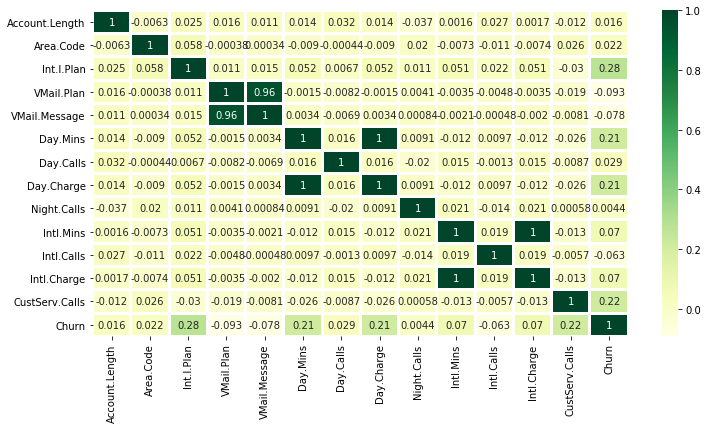

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='YlGn',lw=2)

We can observe that some features are highly correlated:
* `VMail.Plan` & `VMail.Message`
* `Day.Mins` & `Day.Charge`
* `Intl.Mins` & `Intl.Charge`

A variable highly correlated to another won't add any useful information to the models we want to build in the next section, so we decide to consider only a variable per pair.


In [13]:
df = df.drop(['VMail.Message','Day.Charge','Intl.Charge'],axis=1)

Reasoning in the same way, features weakly correlated to the target variable won't probably be very helpful when building a model, so setting a minimum correlation threshold of 0,05 we discard the following covariates:
* `Account.Length` (0.016)
* `Area.Code` (0.022)
* `Day.Calls` (0.029)
* `Night Calls` (0.0044)

In [14]:
df = df.drop(['Account.Length','Area.Code','Day.Calls','Night.Calls'],axis=1)

Moreover, common sense (or domain knowledge, as you name it) make us discard the variable (not in the correlation matrix):
* `Phone`

In [15]:
df = df.drop('Phone',axis=1)

The new dataset is:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 7 columns):
Int.l.Plan        2333 non-null bool
VMail.Plan        2333 non-null bool
Day.Mins          2333 non-null float64
Intl.Mins         2333 non-null float64
Intl.Calls        2333 non-null int64
CustServ.Calls    2333 non-null int64
Churn             2333 non-null bool
dtypes: bool(3), float64(2), int64(2)
memory usage: 79.8 KB


## Exploration

We can start the proper exploration of data attempting to find macroscopic behaviours visible without mining.

We take a synthetic look using seaborn's pairplot, which visualizes the 2-dimensional joint plots of the dataset pairs of variables.

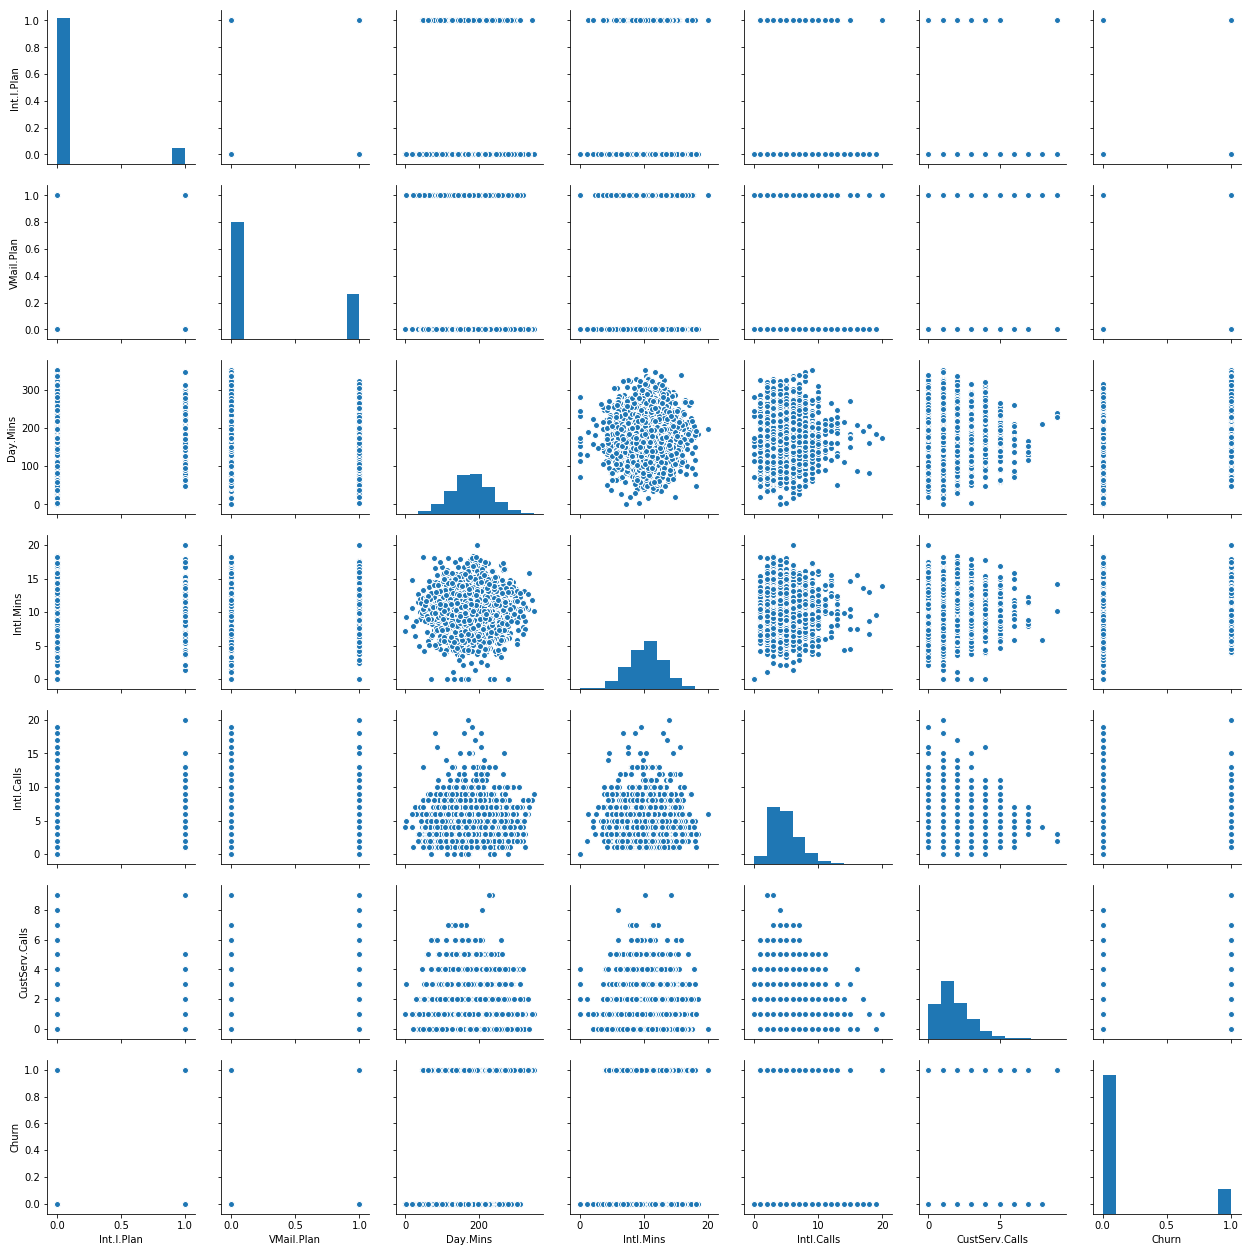

In [17]:
sns.pairplot(data=df)

We don't observe any notable relation between variables, as we expect having discarded the correlated variables.

### Target

First we want to analyze the distribution of the target variable. We simply count each of the two different targets: 

In [18]:
df['Churn'].value_counts()

False    1982
True      351
Name: Churn, dtype: int64

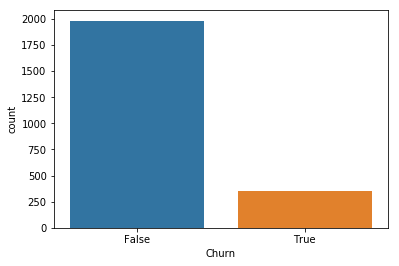

In [19]:
sns.countplot(x=df['Churn'])

### Features

Let's use the correlation matrix to analyze first the features more correlated to the target variable:

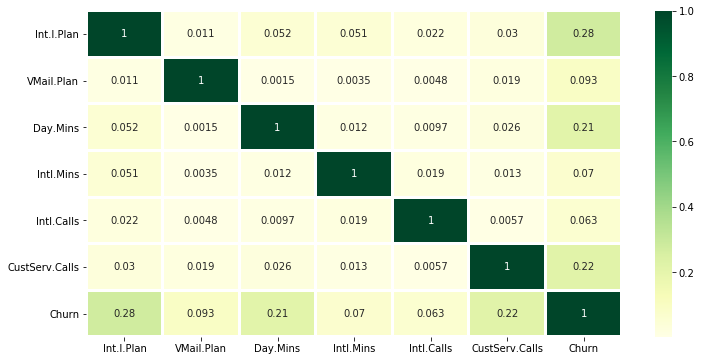

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(abs(df.corr()),annot=True,cmap='YlGn',lw=2)

So we decide to study features in the following order:
* Int.l.Plan
* CustServ.Calls
* Day.Mins
* VMail.Plan
* Intl.Mins
* Intl.Calls

#### Int.l.Plan

Let's take a look to the distribution of this variable, underlining the different distributions for churn and not-churn:

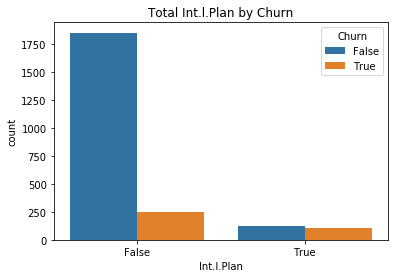

In [21]:
sns.countplot(x='Int.l.Plan',data=df,hue='Churn')
plt.title('Total Int.l.Plan by Churn')

Now let's see the mean of the target variable for each value of Int.l.Plan:

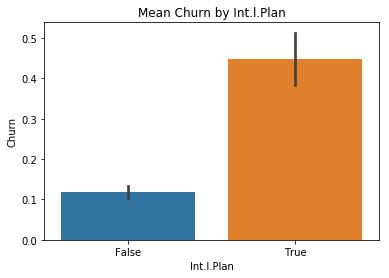

In [22]:
sns.barplot(x=df['Int.l.Plan'],y=df['Churn'])
plt.title('Mean Churn by Int.l.Plan')

We can observe that the churn ratio when the International Plan is subscribed is much higher (45% vs 10%), so the plan seems to be unuseful or even counterproductive.

We want to verify that this behaviour doesn't depend on a low numerosity of the International Plan subscriptions:

In [23]:
df['Int.l.Plan'].value_counts()

False    2103
True      230
Name: Int.l.Plan, dtype: int64

That doesn't seems the case.

#### CustServ.Calls

Let's take a look to the distribution of the CustServ.Calls variable:

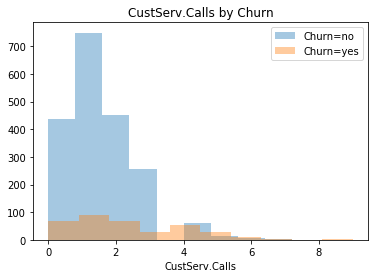

In [24]:
sns.distplot(df[df['Churn']==False]['CustServ.Calls'],kde=False,label='Churn=no',bins=10)
sns.distplot(df[df['Churn']==True]['CustServ.Calls'],kde=False,label='Churn=yes',bins=10)
plt.title('CustServ.Calls by Churn')
plt.legend()

The proportion of total CustServ.Calls is of course unbalanced towards the customers who didn't churn much more numerous than their counterparts who did churn:

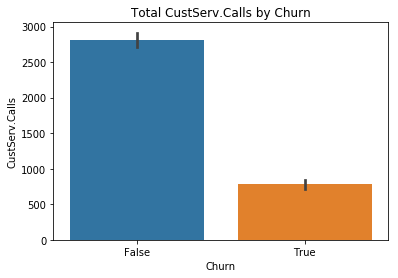

In [25]:
sns.barplot(x='Churn',y='CustServ.Calls',data=df,estimator=sum)
plt.title('Total CustServ.Calls by Churn')

In the detail:

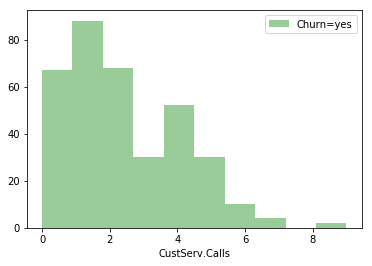

In [26]:
sns.distplot(df[df['Churn']==True]['CustServ.Calls'],kde=False,label='Churn=yes', bins=10, color='green')
plt.legend()

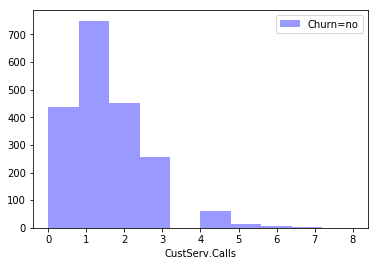

In [27]:
sns.distplot(df[df['Churn']==False]['CustServ.Calls'],kde=False,label='Churn=no', bins=10, color='blue')
plt.legend()

Both loyal and disloyal customers seem to follow a poisson distribution.

We note a higher number of calls to the customer service in case of churn. To visualize it more efficiently we draw the following barplots:

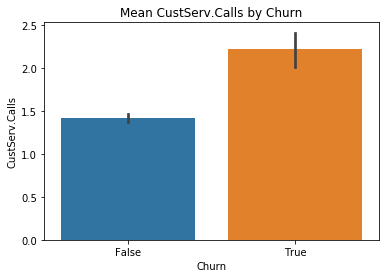

In [28]:
sns.barplot(x='Churn', y='CustServ.Calls',data=df)
plt.title('Mean CustServ.Calls by Churn')

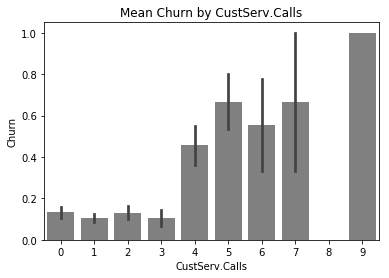

In [29]:
sns.barplot(x='CustServ.Calls', y='Churn',data=df,color='grey')
plt.title('Mean Churn by CustServ.Calls')

Predcitably the number of calls to the customer service is higher in case of churn.

#### Day.Mins

Let's take a look to the distribution of the Day.Mins feature:

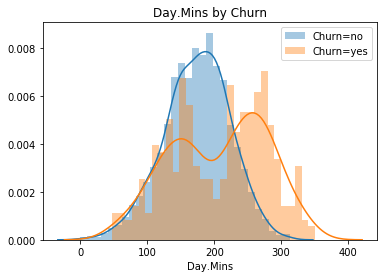

In [30]:
sns.distplot(df[df['Churn']==False]['Day.Mins'],label='Churn=no',bins=30)
sns.distplot(df[df['Churn']==True]['Day.Mins'],label='Churn=yes',bins=30)
plt.title('Day.Mins by Churn')
plt.legend()

We note that unsatisfied customers are more diffused among clients that make a lower and higher number of minutes of calls with respect to the mean of satisfied customers. 

Loyal customers seems to follow a normal distribution, while disloyal customers seem to follow a distribution made by the sum of two normal distributions.

#### VMail.Plan

Let's take a look to the distribution of VMail.Plan similarly to what we have done for the Intl.l.Plan feature: 

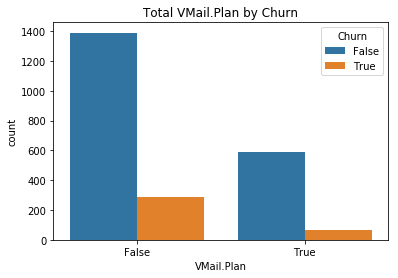

In [31]:
sns.countplot(x='VMail.Plan',data=df,hue='Churn')
plt.title('Total VMail.Plan by Churn')

It seems that the churn ratio is lower in case of Voice Plan subscribed.

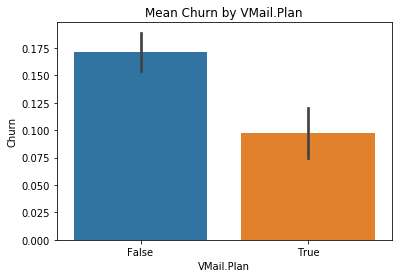

In [32]:
sns.barplot(x=df['VMail.Plan'],y=df['Churn'])
plt.title('Mean Churn by VMail.Plan')

The Voice Plan seems effective, although the gain is negligible (0.1 vs 0.175).

#### Intl.Mins

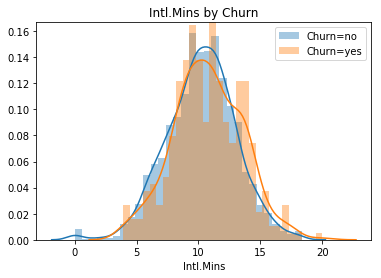

In [33]:
sns.distplot(df[df['Churn']==False]['Intl.Mins'],label='Churn=no',bins=30)
sns.distplot(df[df['Churn']==True]['Intl.Mins'],label='Churn=yes',bins=30)
plt.title('Intl.Mins by Churn')
plt.legend()

Both loyal and disloyal customers seem to follow a normal distribution.

#### Intl.Calls

We eant to visualize the distribution of Intl.Calls by Churn:

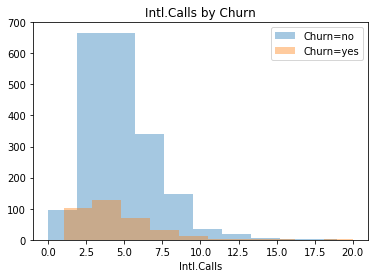

In [34]:
sns.distplot(df[df['Churn']==False]['Intl.Calls'],kde=False,label='Churn=no',bins=10)
sns.distplot(df[df['Churn']==True]['Intl.Calls'],kde=False,label='Churn=yes',bins=10)
plt.title('Intl.Calls by Churn')
plt.legend()

As for CustServ.Calls, the proportion of international calls is unbalanced towards the customers who didn't churn who are much more numerous than their counterparts who did churn:

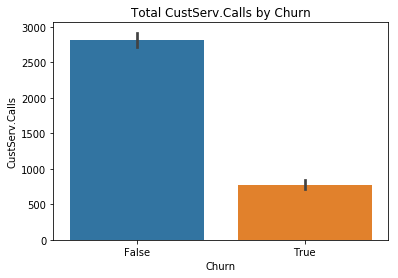

In [35]:
sns.barplot(x='Churn',y='CustServ.Calls',data=df,estimator=sum)
plt.title('Total CustServ.Calls by Churn')

In detail:

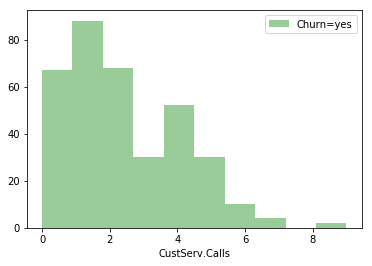

In [36]:
sns.distplot(df[df['Churn']==True]['CustServ.Calls'],kde=False,label='Churn=yes', bins=10, color='green')
plt.legend()

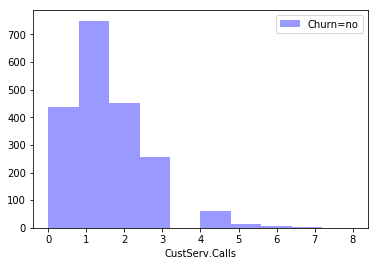

In [37]:
sns.distplot(df[df['Churn']==False]['CustServ.Calls'],kde=False,label='Churn=no', bins=10, color='blue')
plt.legend()

Both loyal and disloyal customers seem to follow a poisson distribution.

As Intl.Mins and Intl.Calls distributions are pretty the same for loyal and disloyal customers, we can strengthen our previous affirmations about the inefficacy of the international plan. 

### Conclusions

This brief descriptive analysis already allows to deduce some conclusions useful to reduce the churn ratio. 

For example we could:
* Eliminate or substitute the international plan
* Strengthen the customer call service
* Promote plans for customers who call less (~150 mins) and for those who call more (~250 mins)

___

To proceed to the next section, let's export the clean dataset, with the features we have selected:

In [55]:
df.to_csv('datasets/churn_working_clean.csv')

In [65]:
def process(churn):
    churn['Int.l.Plan'] = churn['Int.l.Plan']=='yes'
    churn['VMail.Plan'] = churn['VMail.Plan']=='yes'
    return churn.drop(['State','VMail.Message','Day.Charge','Intl.Charge',
                  'Account.Length','Area.Code','Day.Calls','Night.Calls','Phone'],axis=1)

churn_score = pd.read_csv('datasets/churn_score.csv')
process(churn_score).to_csv('datasets/churn_score_clean.csv')